In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [2]:
def list_folder_contents(folder_path, name):
    try:
        contents = os.listdir(folder_path)
        print("Contents of " + name + " folder:")
        for item in contents:
            print(item)
    except FileNotFoundError:
        print(f"Error: Folder '{folder_path}' not found.")
    except PermissionError:
        print(f"Error: Permission denied for folder '{folder_path}'.")

# Example usage:
# folder_path = 'img/traditional'
# list_folder_contents(folder_path)


In [3]:
#function to get image format
def image(name):
    path = 'img/' + name + '.jpg'
    img = cv.imread(path)
    
    formats = ['png', 'jpeg', 'jpg']
    for i in formats:
        #to ensure we get the write format in file
        path = 'img/' + name + '.' + i
        img = cv.imread(path,0)
        #use this to display img in grayscale mode
        # img = cv2.imread(path,0)
        if img is None:
            continue
        else:
            break

    return img

In [4]:
def plotOriginal(image):
    #plot the original img
    plt.subplot(1,2,1)
    plt.title("original")
    plt.imshow(image)

In [5]:
def plotOthers(image,title):
    plt.subplot(1,2,2)
    plt.title(title)
    plt.imshow(image)

In [19]:
def sobel(image):
    #resize images
    image = cv.resize(image, (500,400))
    #Apply Sobel edge detection
    sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)
    #combine the gradient images
    sobel_combined = cv.magnitude(sobel_x, sobel_y)

    plotOthers(sobel_combined, "Sobel Edges")
    return "Process Successful"


In [20]:
def prewitt(image):
    #resize images
    image = cv.resize(image, (500,400))
    #define prewitt kernels
    kernel_x = np.array(
        [[-1,-1,-1],
        [0,0,0],
        [1,1,1]])
    kernel_y = np.array(
        [[-1,0,1],
        [-1,0,1],
        [-1,0,1]])
    #apply prewitt edge detection
    prewitt_x = cv.filter2D(image, -1, kernel_x)
    prewitt_y = cv.filter2D(image, -1, kernel_y)
    #compute magnitude of gradient manually
    prewitt_combined = np.sqrt(np.square(prewitt_x) + np.square(prewitt_y))

    plotOthers(prewitt_combined, "Prewittt Edges")
    return "Process Successful"

In [21]:
def robert(image):
    #perform gausian blur
    image = cv.GaussianBlur(image,(5,5), 0)
    #define robert kernels
    kernel_x = np.array(
        [[1,0],
        [0,-1]])
    kernel_y = np.array(
        [[0,1],
        [-1,0]])
    #apply robert edge detection
    robert_x = cv.filter2D(image, -1, kernel_x)
    robert_y = cv.filter2D(image, -1, kernel_y)
    #compute magnitude of gradient manually
    robert_combined = np.sqrt(np.square(robert_x) + np.square(robert_y))
    
    plotOthers(robert_combined, "Robert Edges")
    return "Process Successful"

In [22]:
def laplacian(img):
    #resize images
    image = cv.resize(image, (400,400))
    #Apply laplacian edge detection
    laplacian = cv.Laplacian(image, cv.CV_64F)
    # convert the output to an 8-bit image
    laplacian = cv.convertScaleAbs(laplacian)
    
    plotOthers(laplacian, "Laplacian Edges")
    return "Process Successful"

In [23]:
def canny(image):
    #resize images
    image = cv.resize(image, (400,400))
    #perform canny edge detection
    edges = cv.Canny(image, 100, 200) #adjust threshold value as needed
    
    plotOthers(edges, "Canny Edges")
    return "Process Successful"

In [24]:
def getImage():
    list_folder_contents('img', 'img')
    folder = input("Enter the folder name from the above listed folder")
    dir = "img/"+folder
    list_folder_contents(dir, folder)
    name = input("Enter the picture name (WITHOUT THE FILE EXTENSION- ie .jpeg)")
    path = folder + "/" + name
    print(path)
    # img = 
    img = image(path)
    if img is None:
        return "Error: Could not read the image."
    # else:
    #     return "Yes"

    return img


In [25]:
def is_valid_email(email):
    # Regular expression pattern for validating email addresses
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    
    # Check if the email matches the pattern
    if re.match(pattern, email):
        return True
    else:
        return False

In [26]:
def operation(img):
    operation = int(input('Enter a number to perform an edge detection: \n1 for sobel,\n2 for prewitt,\n3 for robert,\n4 for laplacian, \n5 for canny\n'))
    plotOriginal(img)
    if(operation == 1):
        sobel(img)
    elif(operation == 2):
        prewitt(img)
    elif(operation == 3):
        robert(img)
    elif(operation == 4):
        laplacian(img)
    elif(operation == 5):
        canny(img)
    else:
        return "invalid input"

Enter email address:  lota@gmail.com
Enter age:  20


lota@gmail.com logged in successfully
Contents of img folder:
.DS_Store
Traditional
Modern
Contemporary


Enter the folder name from the above listed folder modern


Contents of modern folder:
Red sky.jpg
Nnamdi Azikiwe.jpg
unknown.jpg


Enter the picture name (WITHOUT THE FILE EXTENSION- ie .jpeg) red sky


[ WARN:0@865.098] global loadsave.cpp:248 findDecoder imread_('img/modern/red sky.png'): can't open/read file: check file path/integrity
[ WARN:0@865.099] global loadsave.cpp:248 findDecoder imread_('img/modern/red sky.jpeg'): can't open/read file: check file path/integrity


modern/red sky


Enter a number to perform an edge detection: 
1 for sobel,
2 for prewitt,
3 for robert,
4 for laplacian, 
5 for canny
 1


'lota@gmail.com logged in successfully'

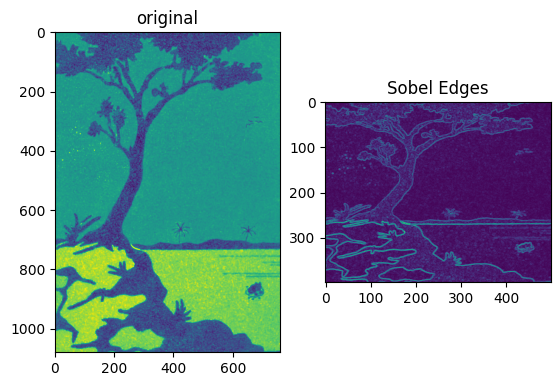

In [27]:
def login():
    email = input('Enter email address: ')

     # if invalid email
    if not is_valid_email(email):
        return "invalid email"

    
    age = int(input('Enter age: '))  
    
    #ending process if age is invalid
    if(age < 18):
        return "Invalid Age. Process terminated"

    #Age is valid

    print(email+" logged in successfully")

    #using the image function to end process if image cant be gotten
    img = getImage()
    if img is None:
        return "Error: Could not read the image."

    operation(img)

    #remove/delete created GUI window from screen and memory
    cv.destroyAllWindows()

    return email+ " logged in successfully"

login()
